**Topic:**      Challenge Set 3 <br>
**Subject:**     2013 Movies <br>
**Date:**         04/18/2018 <br>
**Name:**         Tim Rappold <br>

**Pandas Challenges**

**Topic**: Pandas (Exploring and visualizing our scraped movie data in pandas)

Just getting started? Read this guide: [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)

**Data**: Your own data! But: if you don't have movie data to work on yet, you can use some data on the top grossing 100 movies from 2013, scraped from Box Office Mojo: `2013_movies.csv`

------

In [355]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

**Challenge 1**

Plot domestic total gross over time.

In [356]:
!ls
movies = pd.read_csv('2013_movies.csv')
movies.head()

#movies.plot(x='ReleaseDate',y='Runtime')

2013_movies.csv                explore_luther.ipynb
LICENSE                        rappold_tim_challenge_3.ipynb
README.md                      redfin_2018-04-18-08-51-54.csv
data.txt


,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [357]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ KB


In [358]:
movies['ReleaseDate'] = (
                    pd.to_datetime(movies['ReleaseDate'],
                    format="%Y-%m-%d %H:%M:%S")
                    )

In [359]:
months = pd.date_range(start='2013-01-01', end='2014-01-01',freq='MS')#, periods=12,)# freq='D', tz=None, normalize=False, name=None, closed=None, **kwargs)

print(months)

DatetimeIndex(['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01'],
              dtype='datetime64[ns]', freq='MS')


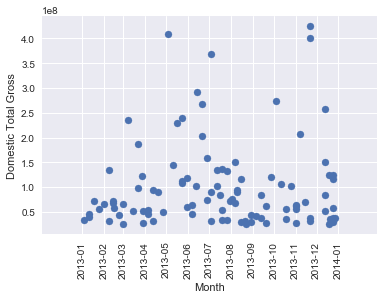

In [360]:
x = movies['ReleaseDate'].values
y = movies['DomesticTotalGross']

#movies.plot(x='ReleaseDate',y='DomesticTotalGross',kind='scatter')
plt.scatter(x,y)
plt.xticks(rotation='vertical')
plt.xlabel('Month')
plt.ylabel('Domestic Total Gross')
plt.xticks(months);

**Challenge 2**

Plot runtime vs. domestic total gross.

Text(0,0.5,'DomesticTotalGross')

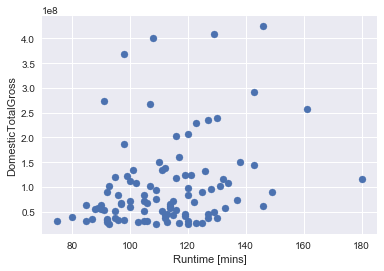

In [361]:
x = movies['Runtime']
y = movies['DomesticTotalGross']

plt.scatter(x,y)
plt.xlabel('Runtime [mins]')
plt.ylabel('DomesticTotalGross')

**Challenge 3**

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [362]:
rating_group = movies.groupby('Rating')['Runtime','DomesticTotalGross']
rating_group.mean()

,Runtime,DomesticTotalGross
Rating,,
G,107.000000,2.684928e+08
PG,99.933333,1.311357e+08
PG-13,117.510638,1.114498e+08
R,110.729730,6.989243e+07


**Challenge 4**

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

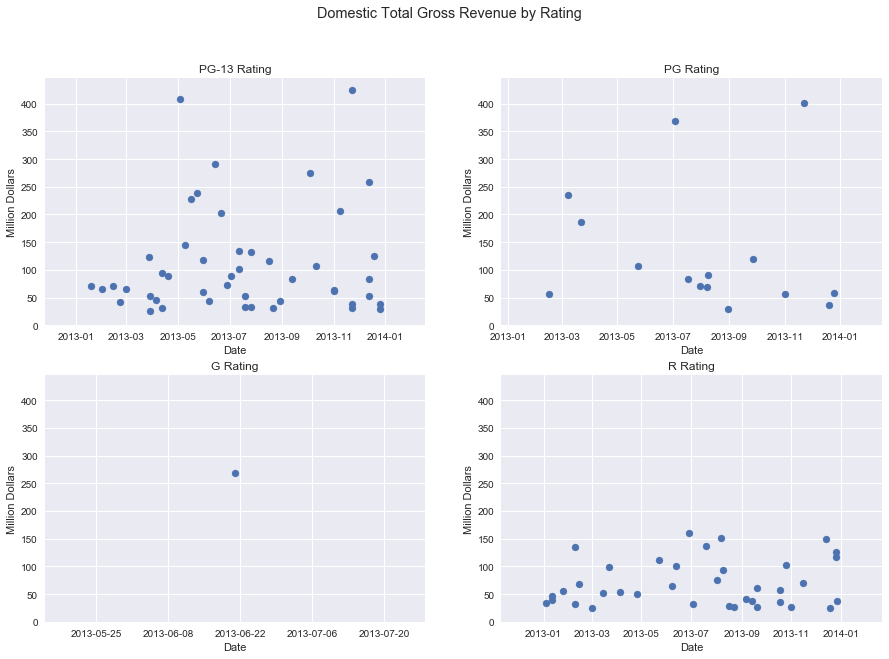

In [363]:
#fig, axes = plt.subplots(2,2, figsize=(15,10))

y_scale = 10**-6
ymax = movies['DomesticTotalGross'].max()*y_scale

plt.figure(figsize=(15,10))
plt.suptitle('Domestic Total Gross Revenue by Rating')

for num, rating in enumerate(movies['Rating'].unique()):
    plt.subplot(2,2,num+1)
    x = movies[movies['Rating']==rating]['ReleaseDate'].values
    y = movies[movies['Rating']==rating]['DomesticTotalGross']*y_scale
    plt.scatter(x,y)
    plt.ylim(0,ymax*1.05)
    plt.title('{} Rating'.format(rating))
    plt.ylabel('Million Dollars')
    plt.xlabel('Date')
    #print(rating)

In [364]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1de8d160>,
      dtype=object)

**Challenge 5**

What director in your dataset has the highest gross per movie?

In [365]:
movies.sort_values('DomesticTotalGross',ascending=False)['Director'].iloc[0]

'Francis Lawrence'

In [366]:
movies[movies['DomesticTotalGross']==movies['DomesticTotalGross'].max()]['Director']

0    Francis Lawrence
Name: Director, dtype: object

In [367]:
movies['Director'].loc[movies['DomesticTotalGross'].idxmax()]

'Francis Lawrence'

**Challenge 6**

Bin your dataset into months and make a bar graph of the mean domestic total gross by month.  Error bars will represent the standard error of the mean.

Title of graph should include:  Mean Domestic Total Gross by Month in 2013

Topic for consideration:  what is the correct formula for the standard error of the mean?  Examine the error bars and see if they are "reasonable."

In [368]:
movies['Month_num']=movies['ReleaseDate'].apply(lambda s:s.month)

movies['Month']=movies['ReleaseDate'].apply(lambda s:s.strftime("%b"))
movies.sort_values('ReleaseDate',inplace=True)
movies.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Month_num,Month
83,Texas Chainsaw 3D,NaN,34341945,John Luessenhop,R,92,2013-01-04,1,Jan
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,2013-01-11,1,Jan
70,Gangster Squad,60000000.0,46000903,Ruben Fleischer,R,113,2013-01-11,1,Jan
46,Mama,15000000.0,71628180,Andres Muschietti,PG-13,100,2013-01-18,1,Jan
63,Hansel and Gretel: Witch Hunters,50000000.0,55703475,Tommy Wirkola,R,88,2013-01-25,1,Jan


Using the Standard Error of the Mean as the estimate. "Standard error of the mean tells you how accurate your estimate of the mean is likely to be."

In [369]:
stats_gross = (movies.groupby(['Month_num','Month'])
               ['DomesticTotalGross']
               .agg(['mean','sem'])
              )

In [370]:
stats_gross

,,mean,sem
Month_num,Month,,
1,Jan,4.954324e+07,6.555914e+06
2,Feb,6.738601e+07,1.240927e+07
3,Mar,9.609710e+07,2.441314e+07
4,Apr,6.094072e+07,1.032911e+07
5,May,1.774097e+08,3.951859e+07
6,Jun,1.506500e+08,3.365826e+07
7,Jul,1.057807e+08,2.638732e+07
8,Aug,6.853126e+07,1.245915e+07
9,Sep,6.171231e+07,1.421654e+07


In [371]:
x=np.arange(12)
mean = stats_gross['mean']
std = stats_gross['sem']

In [372]:
x= stats_gross.index.get_level_values('Month')

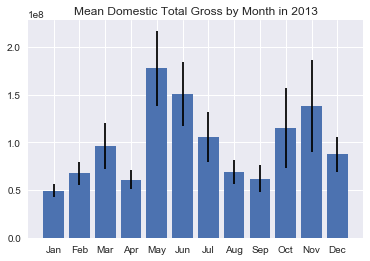

In [373]:

plt.bar(x,mean, yerr=std)

plt.xticks(x, labels)

plt.title('Mean Domestic Total Gross by Month in 2013');